In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
import seaborn as sns

# Simulate Archimedean Copula

In this section, we show how to simulate multiple copulas which have been implemented.

First, we import the files from the corresponding github using the !git command

In [2]:
!git clone https://github.com/Aleboul/var_FMAdo/

fatal: destination path 'var_FMAdo' already exists and is not an empty directory.


It is now done, we can import the following files. 

In [3]:
from var_FMado.bivariate import base
from var_FMado.bivariate import archimedean
from var_FMado.bivariate import monte_carlo

Now, we propose to simulate a Clayton Copula which can be defined by :

\begin{equation}
  C(u,v) = max\left(u^{-\theta} + v^{-\theta} -1 ,0\right)
\end{equation}

For that, the method **sample_unimargin()** permits us to sample from a copula.

In [4]:
copula = archimedean.Clayton(copula_type= 'CLAYTON', random_seed = 42, theta = -0.8, n_sample = 5000)
sample = copula.sample_unimargin()

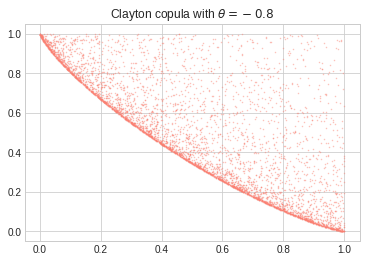

In [5]:
fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 1, alpha = 0.5, color = 'salmon')
ax.set_title(r'Clayton copula with $\theta = -0.8$')
plt.show()

In [6]:
copula = archimedean.Clayton(copula_type= 'CLAYTON', random_seed = 42, theta = 4, n_sample = 5000)
sample = copula.sample_unimargin()

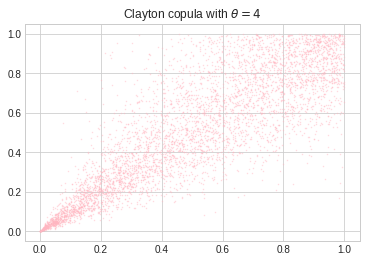

In [7]:
fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 1, alpha = 0.5, color = 'lightpink')
ax.set_title(r'Clayton copula with $\theta = 4$')
plt.show()

Now, we propose to simulate the Joe Copula which are given by :

\begin{equation}
  -\frac{1}{\theta}log\left[1 + \frac{(exp(-\theta u)-1)(exp(\theta v)-1)}{exp(-\theta) - 1}\right]
\end{equation}

In [8]:
copula = archimedean.Frank(copula_type= 'FRANK', random_seed = 42, theta = -12, n_sample = 5000)
sample = copula.sample_unimargin()

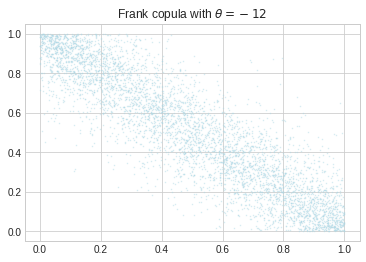

In [9]:
fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 1, alpha = 0.5, color = 'lightblue')
ax.set_title(r'Frank copula with $\theta = -12$')
plt.show()

In [10]:
copula = archimedean.Frank(copula_type= 'FRANK', random_seed = 42, theta = 8, n_sample = 5000)
sample = copula.sample_unimargin()

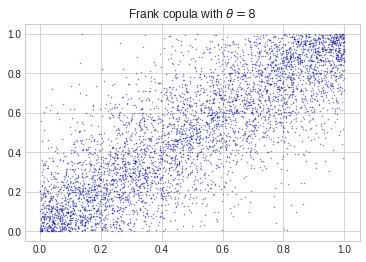

In [11]:
fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 1, alpha = 0.5, color = 'darkblue')
ax.set_title(r'Frank copula with $\theta = 8$')
plt.show()

# Compute numerically the variance of the FMadogram

In this section, we show how to evaluate numerically the variance of the FMadogram for a given $\theta$ and $\lambda$. For this purpose we illustrate this point with a Gumbel copula and a Frank copula. For the first one, we use a Gumbel copula with $\theta = 1$ (independent copula).

In [12]:
n_iter = 200
n_sample = [32,64,128]
theta = 1
lmbd = 0.5
random_seed = 42
copula = archimedean.Gumbel(copula_type = 'GUMBEL', random_seed = random_seed, theta = theta, n_sample = np.max(n_sample))
Monte = monte_carlo.Monte_Carlo(n_iter= n_iter, n_sample= n_sample, lmbd = lmbd,random_seed= random_seed, copula= copula)

Let's represent our data, here we have inverted our simulation from a Gumbel copula with the generalized inverse of a gaussian's cdf. 

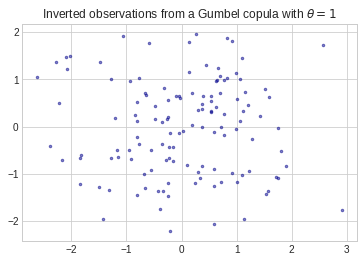

In [13]:
sample = copula.sample()
fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 5, alpha = 0.5, color = 'darkblue')
ax.set_title(r'Inverted observations from a Gumbel copula with $\theta = 1$')
plt.show()

This cloud looks like as the realisation of a centered Gaussian vector and isotropic covariance matrix (with $\sigma^2 = 1$). And it is!

On lines below, we have initialized our Gumbel copula with $\theta = 1$ and with a length a sample of 128 observations.

Furthermore, we have initialized our Monte Carlo subject specifying the number of iterations (100) and the list of length of sample going from 32 to 128 ([32,64,128]). Using this object, we can obtain several estimator of FMadogram.

In [14]:
df_FMado = Monte.simu()
df_FMado

,FMado,n,gp,scaled
0,0.145459,32.0,0.0,0.089620
1,0.145340,64.0,1.0,0.108315
2,0.139933,128.0,2.0,0.081569
3,0.115695,32.0,0.0,-0.078748
4,0.121586,64.0,1.0,-0.081712
...,...,...,...,...
595,0.131002,64.0,1.0,-0.006385
596,0.133764,128.0,2.0,0.011775
597,0.129310,32.0,0.0,-0.001731
598,0.129842,64.0,1.0,-0.015667


Here, we obtain 600 estimations of the FMadogram for an independent copula with a varying n. We make use of **copula.var_FMado(lmbd)** to compute the variance numerically.

In [15]:
def gauss_function(x, x0, sigma):
    return np.sqrt(1 / (2*np.pi * sigma**2)) * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2) )

sigma = np.sqrt(copula.var_FMado(lmbd))

x = np.linspace(min(df_FMado['scaled']), max(df_FMado['scaled']), 1000)
gauss = gauss_function(x,0, sigma)

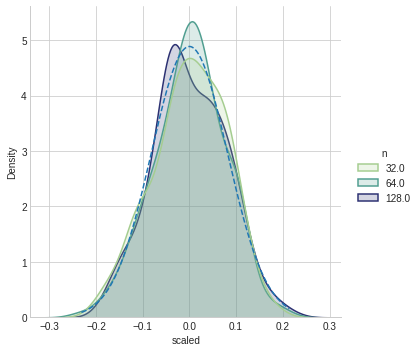

In [16]:
sns.displot(data = df_FMado, x = "scaled", hue = "n", palette= "crest", kind = 'kde', common_norm = False, alpha = 0.2, fill = True, linewidth = 1.5)
plt.plot(x,gauss, linestyle = '--')

Now, let's go with some dependency. We now simulate a Gumbel copula with $\theta = 5$. Let's present our data !

In [17]:
n_iter = 200
n_sample = [32,64,128]
theta = 5
lmbd = 0.5
random_seed = 42
copula = archimedean.Gumbel(copula_type = 'GUMBEL', random_seed = random_seed, theta = theta, n_sample = np.max(n_sample))
Monte = monte_carlo.Monte_Carlo(n_iter= n_iter, n_sample= n_sample, lmbd = lmbd,random_seed= random_seed, copula= copula)

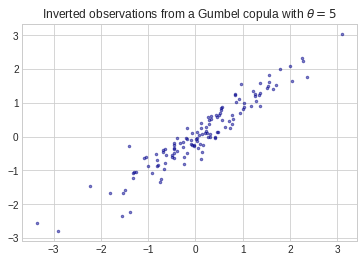

In [18]:
sample = copula.sample()
fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 5, alpha = 0.5, color = 'darkblue')
ax.set_title(r'Inverted observations from a Gumbel copula with $\theta = 5$')
plt.show()

We obviously see a dependency among observation (a positive one)! We now make use of the same lines of code to show that we are able to compute the exact variance of our estimator.

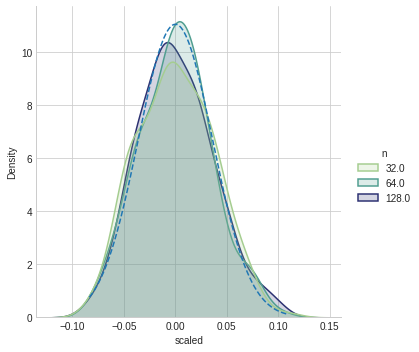

In [19]:
df_FMado = Monte.simu()
df_FMado

sigma = np.sqrt(copula.var_FMado(lmbd))

x = np.linspace(min(df_FMado['scaled']), max(df_FMado['scaled']), 1000)
gauss = gauss_function(x,0, sigma)

sns.displot(data = df_FMado, x = "scaled", hue = "n", palette= "crest", kind = 'kde', common_norm = False, alpha = 0.2, fill = True, linewidth = 1.5)
plt.plot(x,gauss, linestyle = '--')

Again, our estimations fits well with the dotted line which is the centered gaussian with variance computed numerically.

Now, we should use another Copula (maybe with negative dependence)! For that, Frank Copula will be the perfect candidate!

In [20]:
n_iter = 200
n_sample = [32,64,128]
theta = -8
lmbd = 0.4
random_seed = 42
copula = archimedean.Frank(copula_type = 'FRANK', random_seed = random_seed, theta = theta, n_sample = np.max(n_sample))
Monte = monte_carlo.Monte_Carlo(n_iter= n_iter, n_sample= n_sample, lmbd = lmbd,random_seed= random_seed, copula= copula)

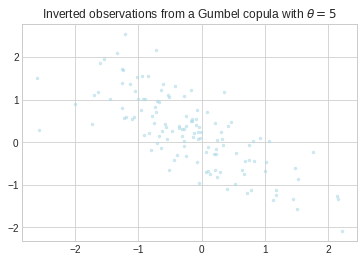

In [21]:
sample = copula.sample()
fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 5, alpha = 0.5, color = 'lightblue')
ax.set_title(r'Inverted observations from a Gumbel copula with $\theta = 5$')
plt.show()

Here, we have our negative dependence!

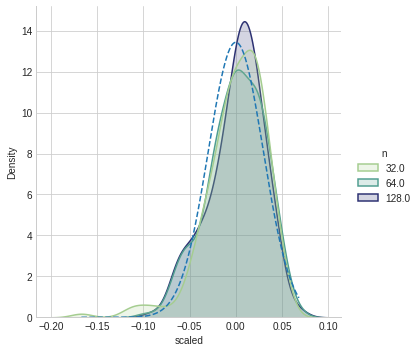

In [22]:
df_FMado = Monte.simu()
df_FMado

sigma = np.sqrt(copula.var_FMado(lmbd))

x = np.linspace(min(df_FMado['scaled']), max(df_FMado['scaled']), 1000)
gauss = gauss_function(x,0, sigma)

sns.displot(data = df_FMado, x = "scaled", hue = "n", palette= "crest", kind = 'kde', common_norm = False, alpha = 0.2, fill = True, linewidth = 1.5)
plt.plot(x,gauss, linestyle = '--')